# Gold Ring Problem

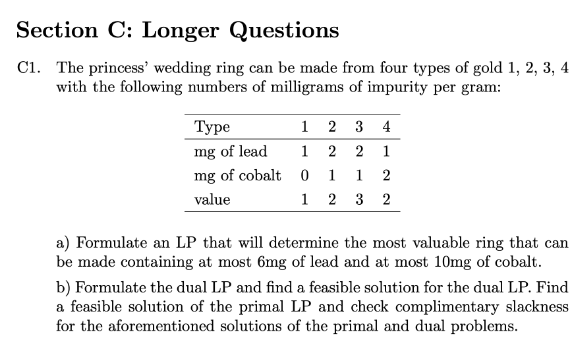

In [3]:
from IPython.display import Image
Image(filename="img/ring.png", width=400,height=400)

In [4]:
from pyomo.environ import *

In [5]:
model       = AbstractModel()
model.j     = Set()

#model.a = Param(model.i,model.j,mutable=True)
model.lead = Param(model.j,mutable=True)
model.cobalt = Param(model.j,mutable=True)
model.value = Param(model.j,mutable=True)
#amount of each T compound
def xbounds(model,j):
    return (0,1000) 
model.x = Var(model.j, bounds=xbounds,domain=NonNegativeIntegers)

def con1_rule(model):
    return sum( model.x[j]*model.lead[j] for j in model.j) <=12
model.con1 = Constraint(rule=con1_rule)

def con2_rule(model):
    return sum( model.x[j]*model.cobalt[j] for j in model.j) <=12
model.con2 = Constraint(rule=con2_rule)

def obj_rule(model):
    return sum(model.value[j]*model.x[j] for j in model.j)
model.OF = Objective(rule=obj_rule,sense=maximize)


In [7]:
instance = model.create_instance("gold_ring.dat")

In [8]:
opt = SolverFactory('glpk')
results = opt.solve(instance) # solves and updates instance
if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
    print('feasible')
elif (results.solver.termination_condition == TerminationCondition.infeasible):
    print('infeasible')
else:
    print ('Solver Status:',  results.solver.status)

feasible


In [9]:
print('OF=',round(value(instance.OF),2))
for j in instance.j:
    print(j, value(instance.x[j]))

OF= 17.0
T1 1.0
T2 0.0
T3 1.0
T4 2.0
